# Importando librerias 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
archivo=pd.read_csv('path_to_prueba_historico.csv')

In [3]:
archivo.head()

,product,program,station_key_market,creative_key,spend,type,id,time,value
0,PurpleBricks.com,Classic Rock,WNNJ - 0,ZPUR0037000_UGH_PHONE_NUMBER_RADIO_30_MIX,540,Radio - P12+,Week3_5280,2018-10-15 13:18:00 UTC,0.00
1,PurpleBricks.com,Jerry Springer,CW - Tampa,Car Wash / License number,365,TV - HH,Week3_0184,2018-09-25 07:38:00 UTC,0.30
2,PurpleBricks.com,blackish,CW - Tampa,Car Wash / License number,366,TV - HH,Week3_0274,2018-09-25 18:56:00 UTC,0.00
3,PurpleBricks.com,Two and a Half Men,CW - Tampa,Car Wash / License number,367,TV - HH,Week3_0321,2018-09-25 22:42:00 UTC,9.08
4,PurpleBricks.com,The King of Queens,CW - Tampa,Car Wash / License number,368,TV - HH,Week3_0411,2018-09-26 17:57:00 UTC,0.00


# Periodo de estudio

`Primera fecha registrada`

In [4]:
archivo['time'].min() # Primera fecha registrada 

'2017-09-14 21:34:00 UTC'

`Primera fecha registrada`

In [5]:
archivo['time'].max() # Ultima fecha 

'2018-11-12 23:33:00 UTC'

# Informacion del dataset

Podemos observar que nuestra informacion esta limpia y no tenemos datos faltantes .

In [6]:
archivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38840 entries, 0 to 38839
Data columns (total 9 columns):
product               38840 non-null object
program               38840 non-null object
station_key_market    38840 non-null object
creative_key          38840 non-null object
spend                 38840 non-null int64
type                  38840 non-null object
id                    38840 non-null object
time                  38840 non-null object
value                 38840 non-null float64
dtypes: float64(1), int64(1), object(7)
memory usage: 2.7+ MB


# Programas registrados en nuestra base de datos 

In [7]:
archivo['program'].nunique()

4010

# Top 10 de programas con mas registros 

In [8]:
archivo['program'].value_counts().head(10)

Classic Rock                   1987
Country                        1748
Classic Hits                   1405
AC Full Panel Non-Billboard    1370
R&B Non-Billboard              1078
AC Full Panel                   860
News/Talk                       855
Top Forty Full Panel            428
DATELINE MF                     281
Mainstream Rock                 220
Name: program, dtype: int64

# Estaciones de mercado claves 

In [9]:
archivo['station_key_market'].nunique()

309

# Top 10 de estaciones claves 

In [10]:
archivo['station_key_market'].value_counts().head(10)

FOX TELEVISION NETWORK-KTTV-TV - Los Angeles     1965
INDY-KDOC-TV - Los Angeles                        951
CW TELEVISION NETWORK-KTLA-TV - Los Angeles       861
ABC TELEVISION NETWORK-KESQ-TV - Palm Springs     851
CBS TELEVISION NETWORK-KCBS-TV - Los Angeles      800
NBC TELEVISION NETWORK-KNBC-TV - Los Angeles      788
FOX TELEVISION NETWORK-KDFX-TV - Palm Springs     716
ABC TELEVISION NETWORK-KABC-TV - Los Angeles      709
NBC TELEVISION NETWORK-KMIR-TV - Palm Springs     641
FOX TELEVISION NETWORK-KMPH-TV - Fresno           634
Name: station_key_market, dtype: int64

# Top 10 de las estaciones que generan mas valor

Ahora debemos analizar los datos de `creative_key` para analizar cual tiene mayor peso en el analisis .

In [11]:
cadena_clave=archivo[['station_key_market','spend','value']].groupby(['station_key_market']).sum()
cadena_clave.sort_values(by=['value'],ascending=False).head(10)

,spend,value
station_key_market,,
ABC TELEVISION NETWORK-WABC-TV - New York,554300,9682.09
FOX TELEVISION NETWORK-KTTV-TV - Los Angeles,1590045,8876.94
FOX TELEVISION NETWORK-WNYW-TV - New York,913080,8810.52
NBC TELEVISION NETWORK-WNBC-TV - New York,471695,7920.78
INDY-KDOC-TV - Los Angeles,94645,7156.49
CBS TELEVISION NETWORK-WCBS-TV - New York,511400,7131.65
CW TELEVISION NETWORK-WPIX-TV - New York,394200,5872.58
CW TELEVISION NETWORK-KTLA-TV - Los Angeles,878325,3795.53
FOX TELEVISION NETWORK-KMPH-TV - Fresno,66363,3635.99


# Creative key

In [12]:
archivo['creative_key'].nunique()

78

# Top 10 de creative key

In [13]:
archivo['creative_key'].value_counts().head(10)

ZPUR0018000H                                 10441
ZPUR0016000H                                  6023
ZPUR0037000_UGH_PHONE_NUMBER_RADIO_30_MIX     5304
ZPUR0039000_WORDS_PHONE_NUMBER_30             5249
Car Wash / License number                     2079
Pool / License number / H                     2043
ZPUR0028000H                                  1111
ZPUR0027000H                                  1059
ZPUR0001000H                                   867
Car Wash / Phone number /                      821
Name: creative_key, dtype: int64

# Top 30 de creative key que generan mas valor

En esta categoria debemos observar que tenemos unos `ID` muy diferentes  a los que hemos observado anteriormente por lo que vamos a necesitar hacer uso del otro archivo anexo que tenemos a la mano `creative` en donde podemos relacionar a que estacion pertenecen.

In [14]:
orden_creat_key=archivo[['creative_key','spend','value']].groupby(['creative_key']).sum()
orden_creat_key.sort_values(by=['value'],ascending=False).head(28)

,spend,value
creative_key,,
ZPUR0018000H,4052458,66422.8800
ZPUR0016000H,3202042,24458.2300
ZPUR0027000H,1400580,22616.3000
ZPUR0028000H,1580635,20081.3300
ZPUR0039000_WORDS_PHONE_NUMBER_30,2398227,17240.2930
ZPUR0037000_UGH_PHONE_NUMBER_RADIO_30_MIX,2578737,16454.4700
Pool / License number / H,932288,11201.9000
Car Wash / License number,947511,9680.1700
Pool / Phone number / HD,331854,3745.4645


# Creacion del archivo # 2 `creative`

In [15]:
archivo2=pd.read_csv('path_to_prueba_creative.csv')
archivo2.head()

,string_field_0,string_field_1,string_field_2
0,Cici's Celebrity News :30s,ZPUR0005000,Radio
1,Cici's Celebrity News :30s,ZPUR0005000,Radio
2,Wilbur the Weatherman :30s,ZPUR0006000,Radio
3,Wilbur the Weatherman :30s,ZPUR0006000,Radio
4,Travis with Traffic :30s,ZPUR0007000,Radio


# Renombrar las columnas del `archivo2` para hacer un `merge`

En esta ocasion es necesario que hagamos un cambio de nombre de las columnas debido a que necesitamos realizar una union de nuestras 2 dataframes.

In [16]:
archivo2.rename(columns={'string_field_0': 'station_key_market', 'string_field_1': 'creative_key','string_field_2': 'type'}, inplace=True)

In [17]:
archivo2.head()

,station_key_market,creative_key,type
0,Cici's Celebrity News :30s,ZPUR0005000,Radio
1,Cici's Celebrity News :30s,ZPUR0005000,Radio
2,Wilbur the Weatherman :30s,ZPUR0006000,Radio
3,Wilbur the Weatherman :30s,ZPUR0006000,Radio
4,Travis with Traffic :30s,ZPUR0007000,Radio


# Creacion del `"merge"`

In [18]:
left=orden_creat_key.sort_values(by=['value'],ascending=False).head(28)
right=archivo2
pd.merge(left, right, how='inner',on='creative_key')

,creative_key,spend,value,station_key_market,type
0,ZPUR0018000H,4052458,66422.88,Basketball :30s,TV
1,ZPUR0016000H,3202042,24458.23,Pie: 30s,TV
2,ZPUR0027000H,1400580,22616.30,Pie CTA Phone: 30s,TV
3,ZPUR0028000H,1580635,20081.33,Basketball CTA Phone :30s,TV
4,ZPUR0001000H,730375,3592.42,Pie: 30s,TV
5,ZPUR0004000H,321320,1585.22,Birthday :30s,TV


# **Analisis :** 

Al realizar la union de nuestras 2 tablas nos permite observar el papel tan importante que juega la temporada de **`basketball`**

# Las `creative_key` que menos generan valor

En este punto podemos observar la cantidad de dinero que estamos gastando sin generar ningun valor .

In [19]:
key_kill=archivo[archivo['value']==0].groupby(['creative_key']).sum()
key_kill.sort_values(by=['spend'],ascending=False).head(10)

,spend,value
creative_key,,
ZPUR0018000H,1971795,0.0
ZPUR0037000_UGH_PHONE_NUMBER_RADIO_30_MIX,1342309,0.0
ZPUR0016000H,1335104,0.0
ZPUR0039000_WORDS_PHONE_NUMBER_30,1244071,0.0
Car Wash / License number,500766,0.0
Pool / License number / H,464782,0.0
ZPUR0001000H,307535,0.0
ZPUR0028000H,243659,0.0
ZPUR0027000H,194223,0.0


# Perdidas reales que tenemos sin generar valor 

In [20]:
key_kill[['spend','value']].sum()

spend    8433392.0
value          0.0
dtype: float64

In [21]:
archivo[['spend','value']].sum()

spend    1.944640e+07
value    2.115330e+05
dtype: float64

In [22]:
porc_gastos=(key_kill[['spend']].sum()/archivo[['spend']].sum())*100
porc_gastos

spend    43.367362
dtype: float64

# Creacion del dataframe `GASTOS`

In [23]:
gastos={'spend':[11013008.0 , 8433392.0 ]}

In [24]:
gastos=pd.DataFrame(gastos,index=[['generan valor','generan perdidas']])

In [25]:
gastos

,spend
generan valor,11013008.0
generan perdidas,8433392.0


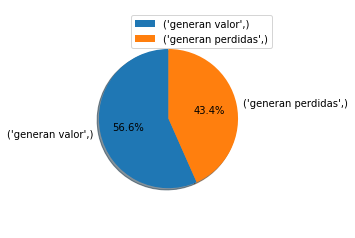

In [26]:
plt.pie(gastos
        ,autopct='%1.1f%%',shadow=True, labels=gastos.index, startangle=90,radius=0.8)
plt.legend(loc=0)

**Analisis :** Podemos observar claramente que el 43% de nuestros gastos en publicidad no estan generando valor 

# Ganancias por medios en los que no gastamos publicidad 

**ANALISIS:** Tener en cuenta que de todos los medios para realizar publicidad los que mas valor estan teniendo son los de TV tradicional seguido de la TDT


In [27]:
Value_by_type=archivo[archivo['spend']==0][['type','value']].groupby(['type']).sum()
Value_by_type

,value
type,
Radio - P12+,399.19
TV,32648.66
TV - HH,5174.16


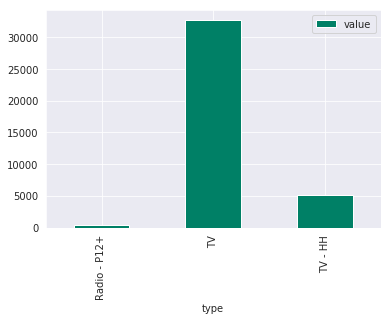

In [28]:
sns.set_style(style='darkgrid')
Value_by_type.plot(kind='bar',colormap='summer')

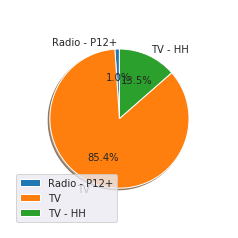

In [29]:
plt.pie(Value_by_type
        ,autopct='%1.1f%%',shadow=True,labels=Value_by_type.index,startangle=90,radius=0.8)
plt.legend(loc=0)

**NOTA :** El 85% de los ingresos en los que no tenemos gastos son provenientes de la TV tradicional

# Analisis de gastos y valor por medio



In [30]:
archivo[['type','spend','value']].groupby(['type']).sum()

,spend,value
type,,
Radio - P12+,4976964,33694.7630
TV,11915205,150340.4200
TV - HH,2554234,27497.8525


**ANALISIS:** Podemos observar que la TV normal no estas ofreciendo un gran valor para la compañia, seguido del radio y de la TDT , pero lo ideal es encontrar cuales nos generan mas valor al menor costo 

# Top 10 de las creative_key de tipo **`RADIO`** que mas generan valor 

In [31]:
orden_by_radio=archivo[archivo['type']=='Radio - P12+'][['value','spend','creative_key']]
orden_by_radio.sort_values(by=['value'],ascending=False).head(10)

,value,spend,creative_key
3828,168.97,540,ZPUR0037000_UGH_PHONE_NUMBER_RADIO_30_MIX
11073,113.05,540,ZPUR0039000_WORDS_PHONE_NUMBER_30
7990,102.62,540,ZPUR0037000_UGH_PHONE_NUMBER_RADIO_30_MIX
12600,93.92,540,ZPUR0037000_UGH_PHONE_NUMBER_RADIO_30_MIX
12234,92.65,540,ZPUR0039000_WORDS_PHONE_NUMBER_30
2284,86.50,98,ZPUR0039000_WORDS_PHONE_NUMBER_30
7929,86.02,540,ZPUR0039000_WORDS_PHONE_NUMBER_30
325,80.55,540,ZPUR0037000_UGH_PHONE_NUMBER_RADIO_30_MIX
4727,79.05,540,ZPUR0037000_UGH_PHONE_NUMBER_RADIO_30_MIX
8619,74.80,540,ZPUR0037000_UGH_PHONE_NUMBER_RADIO_30_MIX


# Top 10 de las creative_key de tipo **`TV`** que mas generan valor

In [32]:
orden_by_radio=archivo[archivo['type']=='TV'][['value','spend','creative_key']]
orden_by_radio.sort_values(by=['value'],ascending=False).head(10)

,value,spend,creative_key
21059,870.78,0,ZPUR0018000H
21145,842.35,9000,ZPUR0018000H
16414,651.65,7,ZPUR0018000H
25812,637.79,25,ZPUR0018000H
20123,596.91,0,ZPUR0018000H
31872,595.99,125,ZPUR0018000H
33430,514.28,1000,ZPUR0018000H
27989,508.56,45,ZPUR0018000H
33838,495.43,0,ZPUR0018000
29245,482.23,55,ZPUR0018000H


# Top 10 de las creative_key de tipo **`TV - HH`** que mas generan valor

In [33]:
orden_by_radio=archivo[archivo['type']=='TV - HH'][['value','spend','creative_key']]
orden_by_radio.sort_values(by=['value'],ascending=False).head(10)

,value,spend,creative_key
5650,160.85,0,Pool / Phone number / HD
3248,124.79,540,Pool / Phone number / HD
4367,124.60,0,Pool / Phone number / HD
9056,118.69,540,Pool / License number / H
11535,99.42,0,Pool / License number / H
5646,87.27,0,Pool / Phone number / HD
9145,83.08,540,Pool / License number / H
4138,76.84,540,Pool / Phone number / HD
2680,76.21,540,Car Wash / License number
11840,73.60,80,Pool / License number / H


In [34]:
archivo['time'].max() # Ultima fecha 

'2018-11-12 23:33:00 UTC'

In [35]:
archivo['time'].min() # Primera fecha registrada 

'2017-09-14 21:34:00 UTC'

# Gastos por medio de publicacion

In [36]:
porcentaje_gastos=archivo[['type','spend']].groupby(['type']).sum()
porcentaje_gastos

,spend
type,
Radio - P12+,4976964
TV,11915205
TV - HH,2554234


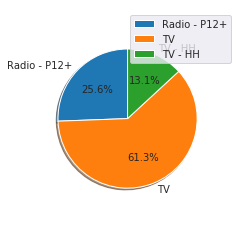

In [37]:
plt.pie(porcentaje_gastos
        ,autopct='%1.1f%%',shadow=True,labels=porcentaje_gastos.index,startangle=90,radius=0.8)
plt.legend(loc=0)

# Generacion de valor por medio de publicacion

In [38]:
porcentaje_value=archivo[['type','value']].groupby(['type']).sum()
porcentaje_value

,value
type,
Radio - P12+,33694.7630
TV,150340.4200
TV - HH,27497.8525


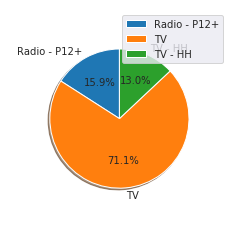

In [39]:
plt.pie(porcentaje_value
        ,autopct='%1.1f%%',shadow=True,labels=porcentaje_value.index,startangle=90,radius=0.8)
plt.legend(loc=0)

# **FINAL...**